# Seaborn: statistical data visualization

Hi guys,<br>
Welcome back to the seaborn: a statistical data visualization section. We are going to talk about Axis grids in this lecture. <br>

# Axis grids


When we are exploring a medium-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of our dataset. **Grid charts/plots** (also called panel, lattice or trellis chart/plots) allows us to quickly extract significant amount of information about the complex data in a series of similar graphs using the same scale and axes. This allows easily comparisons and provides a brief overview of the data under analysis. 

Matplotlib offers good support for making figures with multiple axes; seaborn builds on top of this to directly link the structure of the plot to the structure of our dataset.<br>

Let's learn with some examples using datasets, tips and ["iris"](https://en.wikipedia.org/wiki/Iris_flower_data_set). We have already used tips in out previous lectures. "iris" is very famous dataset and includes three iris species with 50 samples each as well as some properties about each flower. This dataset is a part of seaborn library and also available on [kaggle](https://www.kaggle.com/uciml/iris). 

[Want to read more! check seaborn's official webpage](http://seaborn.pydata.org/tutorial/axis_grids.html#grid-tutorial)<br>

&#9758; *Remember:* <font style="font-size:12px;color:green;">To use axis grids features, your data has to be in a Pandas DataFrame and it must take the form of what Hadley Whickam calls “tidy” data. In brief, that means your dataframe should be structured such that each column is a variable and each row is an observation.</font>

In [1]:
# importing seabron and matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading 'iris' and 'tips' seaborn's built-in datasets
iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")

In [3]:
# Overview of the dataset using info and head
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Let's check the head of the data set 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### <code>FacetGrid() </code>

Let's start with <code>FacetGrid()</code>, which provides a general way to create grids of plots. This is useful when we want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of our dataset. <br>
A FacetGrid can be drawn with up to three dimensions: **row, col, and hue**. The first two have obvious correspondence with the resulting array of axes; think of the **hue** variable as a third dimension along a depth axis, where different levels are plotted with different colors.<br>

We initialize a FacetGrid object with a dataframe and the names of the variables that will form the column, row, or hue dimensions of the grid. These variables should be categorical or discrete, and then the data at each level of the variable will be used for a facet along that axis. <br>
For example, say we wanted to examine differences between lunch and dinner in the tips dataset.<br>
The number of unique values in "day", "time" and "smoker" etc will tell how many columns and rows our grid will have!<br>
Let's check the no of unique value first!

In [6]:
# How many unique values we have in say, time and smoker column
tips["day"].nunique(), tips["time"].nunique(), tips["smoker"].nunique()

(4, 2, 2)

So, we have:
* 4 unique day (Thursday / Friday / Saturday / Sunday)
* 2 unique times (lunch / dinner)
* 2 unique values in smoker (yes / no)

Let's initialize the empty grid for `col = "time"` and `row = "smoker"` first.

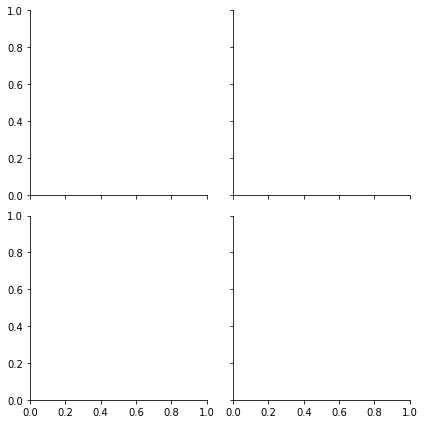

In [7]:
g = sns.FacetGrid(tips, col="time", row="smoker")
#g = sns.FacetGrid(tips, col="day", row="smoker") # 4 col and 2 row

The main approach for visualizing data on the above grid is by using **`FacetGrid.map()`** method `(g.map())`. 
<br>**Let’s look at the distribution of total_bills in each of these subsets, using a histogram.**<br>
Our data is `"total_bills"`, we want `"time"` for columns and row for `"smoker"`.<br>
&#9758;<font style="font-size:12px;color:green;"> Notice, instead of passing numbers e.g. in subplots, to the col and row, we are passing column names and the data frame here.</font>

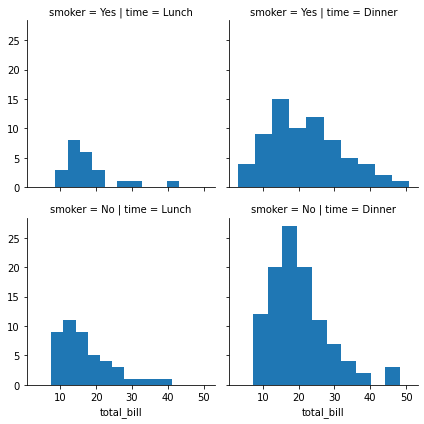

In [8]:
g = sns.FacetGrid(data = tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

So, what we are doing above, we are mapping a plot type `"hist"` for `"total_bills"` and separating the results based on `col "time"` and `row "smoker"`. The output is labeled so that the `x-axis` represent `total_bills`. <br>
Four plots are labeled as `"yes/no"` along the rows for `"smoker"` and `"lunch/dinner"` along the columns for `"time"`.<br>

Let's try another type of plot, e.g. `scatter plot` which takes more than one argument. We are passing `hue = "sex"` and displaying legend to know which color is for what `sex` <br>

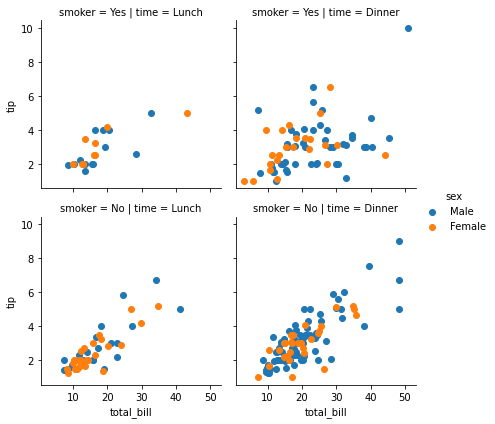

In [9]:
g = sns.FacetGrid(tips, col="time",  row="smoker", hue='sex')
# Notice the arguments for plt.scatter call, we need both x and y!
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

### <code>PairGrid()</code>

Let's talk about the Pairgrid now. PairGrid is a subplot grid for plotting pairwise relationships in a dataset. It's kind of an automated joint plot for the entire dataset. <br>
Seaborn's `PairGrid` mechanism provides great control over the output plots, we can customize our pairplot in the way we want. <br>
Let's play with "iris" data and learn more about the `PairGrid`!

In [10]:
# head of our data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


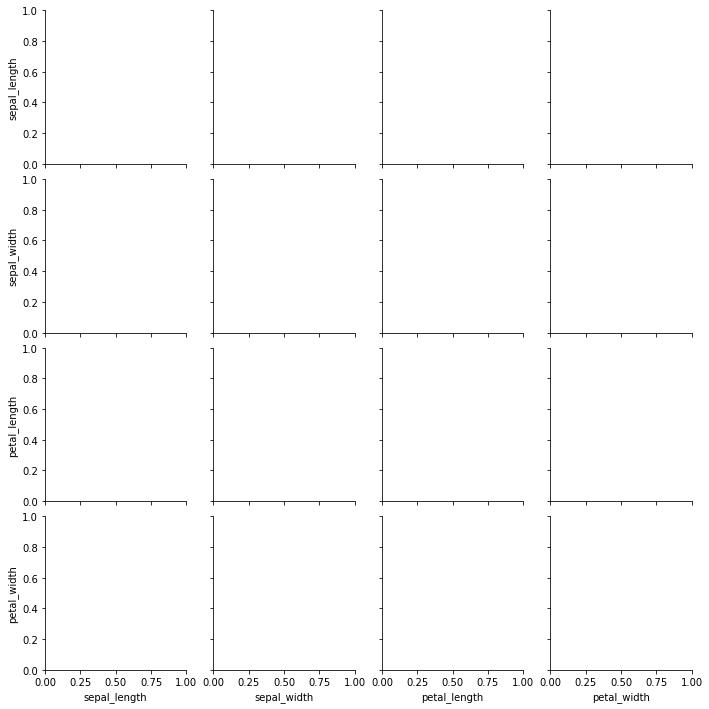

In [11]:
# How the empty PairGrid look like, let's set the grid to a variable "g"!
g = sns.PairGrid(iris)

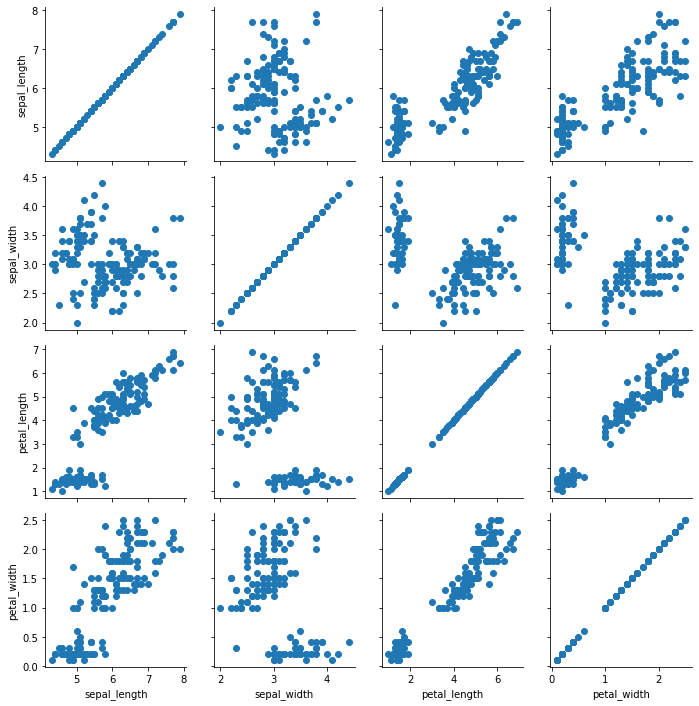

In [12]:
# mapping a scatter plot to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

In the grid above, we can actually control our plots, we can specify what we want to plot along the diagonal using `"map_diag()"` and what on the other part using `"map_offdiag()"` of the grid.

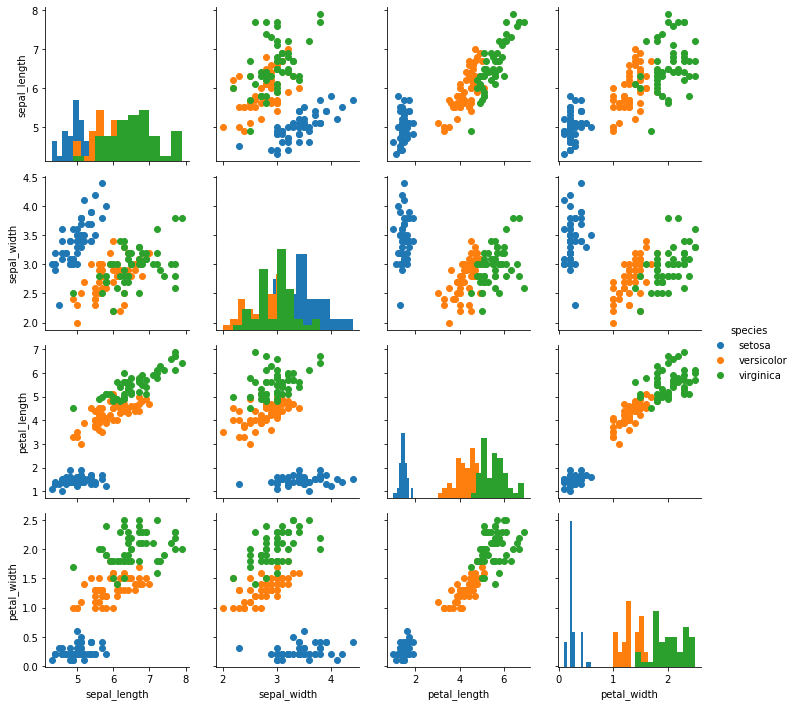

In [13]:
# empty grid first
g = sns.PairGrid(iris , hue="species")
# we want hist plot along the diagonal
g.map_diag(plt.hist)
# we want scatter plot off diagonal 
g.map_offdiag(plt.scatter)
# We can add legend as well
g.add_legend();

It is also possible to use a different function in the **upper and lower triangles** to emphasize different aspects of the relationship.<br>
Let's learn how to do this!

c:\users\hp\.conda\envs\march2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\.conda\envs\march2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\.conda\envs\march2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

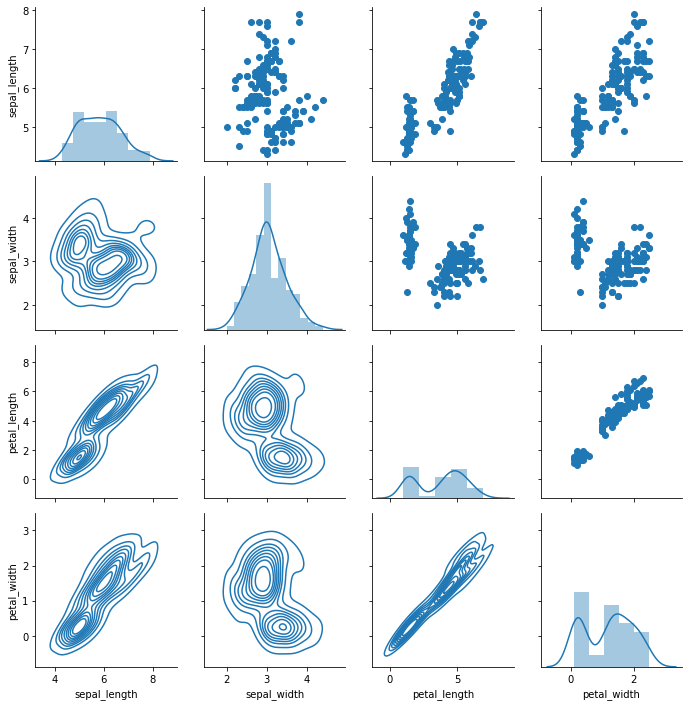

In [14]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

Now, we have lot more control on our plot instead of only a scatter plot of histogram, we have three different types of plots on the same grid for our data. We can chose what plot type we want to map on what part of the grid using seaborn's PairGrid!

### <code>pairplot()</code>
Let's recall our understanding of "<code>pairplot()</code>" from the earlier lecture, distribution plots. 
Remember, we just pass in the data frame to <code>pairplot()</code>  method and it will automatically create the pairplot for us. <br>
&#9758; *pairplot is a simpler version of PairGrid, we will use <code>pairplot()</code> quite often in the course, so it is important to recall this simpler version first.*

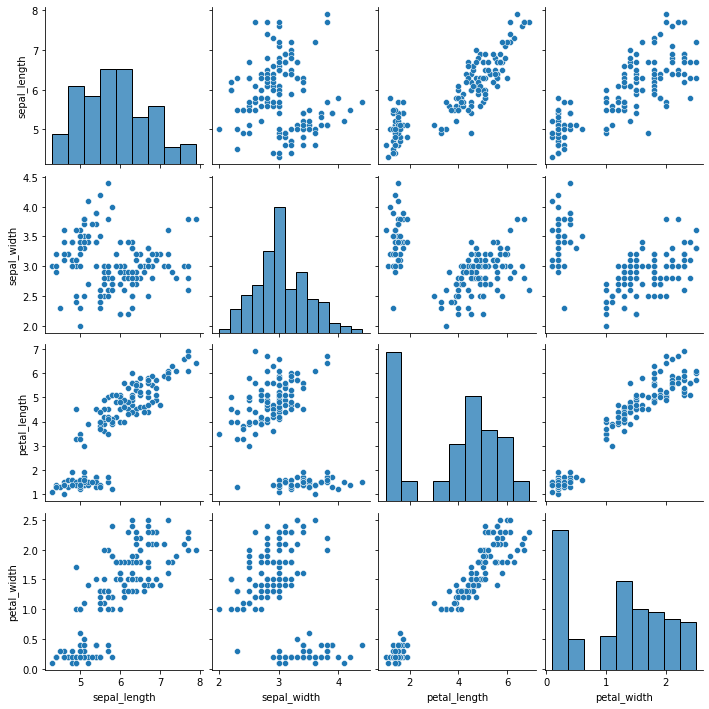

In [15]:
# How the pairplot look like for the entire data
sns.pairplot(iris)

In [16]:
# How many species we have
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

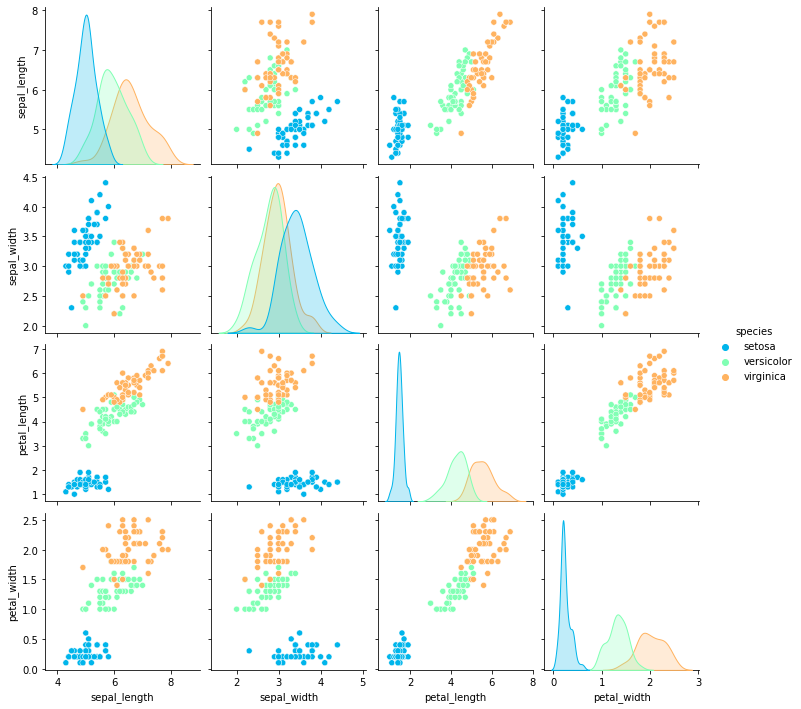

In [17]:
# Let's pass species to hue.
sns.pairplot(iris,hue="species",palette="rainbow")

The pairplot with `hue = "species"` gives much more information as compared to the the first without `hue` parameter. 

### <code>JointGrid()</code>

`JointGrid` is a general version for `jointplot()` type grids:<br>
A quick example using tips dataset: 

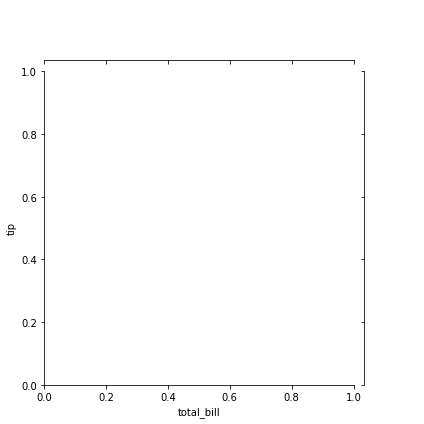

In [18]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

c:\users\hp\.conda\envs\march2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\.conda\envs\march2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\.conda\envs\march2021\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


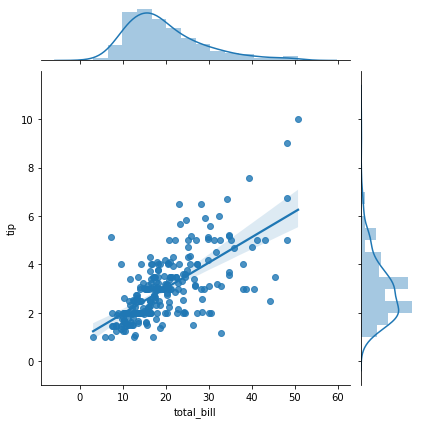

In [19]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

# Excellent Job! 